# **MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿**

## **과제 1️⃣**
### 장르별 영화 트렌드 및 흥행 성공 요인 분석

#### 최근 20년간 영화 장르별 트렌드 변화를 분석하고, 각 장르에서 흥행에 성공한 영화들의 공통 요소(예산, 런타임, 출연진, 개봉 시기 등)를 파악하세요.

In [3]:
import pandas as pd
from IPython.display import display
import warnings
import ast

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = './data/processed/kobis_genre_exploded.csv'

# 데이터 로드
df = pd.read_csv(file_path)

print(f"전체 데이터 수: {len(df)}개")
print(f"장르 수: {df['genres'].nunique()}개")

# 필요한 컬럼만 선택
columns_needed = ['title', 'revenue', 'audience_total', 'runtime', 
                 'director_name_ko', 'cast_names_ko', 'release_date', 'genres']
df_selected = df[columns_needed].copy()

# 컬럼명 변경
df_selected.rename(columns={'director_name_ko': 'director'}, inplace=True)

# 결측치 처리
df_selected = df_selected.dropna(subset=['title', 'revenue', 'genres'])

# 각 장르별 상위 5개 영화 추출
def get_top5_by_genre(df, genre):
    """특정 장르의 revenue 기준 상위 5개 영화 반환"""
    genre_df = df[df['genres'] == genre].copy()
    return genre_df.nlargest(5, 'revenue')

# 모든 장르 리스트 가져오기
all_genres = df_selected['genres'].unique()
print(f"\n발견된 장르들: {len(all_genres)}개")
for genre in sorted(all_genres):
    count = len(df_selected[df_selected['genres'] == genre])
    print(f"- {genre}: {count}편")

# 장르별 상위 5개 영화를 모은 DataFrame 생성
top5_by_genre = []

for genre in sorted(all_genres):
    top5 = get_top5_by_genre(df_selected, genre)
    top5 = top5.copy()
    top5['genre'] = genre
    top5['rank'] = range(1, len(top5) + 1)
    top5_by_genre.append(top5)

# 모든 결과 합치기
result_df = pd.concat(top5_by_genre, ignore_index=True)

# 컬럼 순서 정리
final_columns = ['genre', 'rank', 'title', 'revenue', 'audience_total', 
                'runtime', 'director', 'cast_names_ko', 'release_date']
result_df = result_df[final_columns]

print(f"\n=== 장르별 흥행 상위 5개 영화 결과 ===")
print(f"총 {len(result_df)}개 결과")

# 장르별로 개별 DataFrame display
for genre in sorted(all_genres):
    genre_top5 = result_df[result_df['genre'] == genre]
    if len(genre_top5) > 0:
        print(f"\n🎬 {genre} 장르 TOP 5:")
        display(genre_top5.drop(['genre'], axis=1))

전체 데이터 수: 1554개
장르 수: 20개

발견된 장르들: 20개
- SF: 10편
- 가족: 25편
- 공연: 1편
- 공포(호러): 53편
- 기타: 3편
- 다큐멘터리: 17편
- 드라마: 434편
- 멜로/로맨스: 159편
- 뮤지컬: 3편
- 미스터리: 48편
- 범죄: 100편
- 사극: 44편
- 서부극(웨스턴): 1편
- 스릴러: 126편
- 애니메이션: 43편
- 액션: 167편
- 어드벤처: 20편
- 전쟁: 16편
- 코미디: 259편
- 판타지: 25편

=== 장르별 흥행 상위 5개 영화 결과 ===
총 88개 결과

🎬 SF 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,설국열차,6.681845e+10,9321959.0,125.0,봉준호,크리스 에반스|송강호|에드 해리스|존 허트|틸다 스윈튼|제이미 벨|옥타비아 스펜서|...,2013-08-01
1,2,괴물,6.656903e+10,10892305.0,119.0,봉준호,송강호|변희봉|박해일|배두나|고아성|오달수|박노식|고수희|윤제문|김뢰하,2006-07-27
2,3,연가시,3.206548e+10,4499856.0,109.0,박정우,김명민|문정희|김동완|이하늬|강신일|송영창|조덕현|최정우|전국환|정인기,2012-07-05
3,4,7광구,1.926371e+10,2225436.0,101.0,김지훈,하지원|박철민|이한위|오지호|송새벽|안성기|차예련|박정학|박영수|오민석,2011-08-04
4,5,초능력자,1.524963e+10,2111567.0,114.0,김민석,강동원|고수|김수남|정은채|손지나|최덕문|변희봉|김광규|김인권|김한나,2010-11-10



🎬 가족 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
5,1,괴물,6.656903e+10,10892305.0,119.0,봉준호,송강호|변희봉|박해일|배두나|고아성|오달수|박노식|고수희|윤제문|김뢰하,2006-07-27
6,2,맨발의 기봉이,1.214021e+10,1988117.0,100.0,권수경,신현준|임하룡|탁재훈|김수미|김효진|정구영|강낙호|조덕현|지대한|권병길,2006-04-26
7,3,깡철이,8.501042e+09,1197467.0,108.0,안권태,유아인|김해숙|정유미|김정태|김성오|이시언|신정근|김인우|장태성|이도겸,2013-10-02
8,4,뽀로로 극장판 보물섬 대모험,5.783709e+09,752466.0,79.0,김현호,이선|이미자|김현지|홍소영|정미숙|김서영|김환진|남도형|정승욱|이장원,2019-04-25
9,5,마이 파더,5.330582e+09,834630.0,105.0,황동혁,김영철|다니엘 헤니|김인권|이건문|안석환|김호연|전국환|최종률|이상희|최정원,2007-09-06



🎬 공연 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
10,1,러브 유어셀프 인 서울,3.209683e+09,342366.0,111.0,NaN,김남준|김석진|민윤기|정호석|박지민|김태형|전정국,2019-01-26



🎬 공포(호러) 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
11,1,연가시,3.206548e+10,4499856.0,109.0,박정우,김명민|문정희|김동완|이하늬|강신일|송영창|조덕현|최정우|전국환|정인기,2012-07-05
12,2,오싹한 연애,2.159157e+10,2952858.0,114.0,황인호,손예진|이민기|신동훈|조아라|이현진|이미도|황승언|김현숙|김혜숙|박재우,2011-12-01
13,3,곤지암,2.133222e+10,2662377.0,94.0,정범식,위하준|박지현|오아연|문예원|이승욱|류제윤|박성훈|이주원|정아노마,2018-03-28
14,4,변신,1.537602e+10,1797796.0,112.0,김홍선,배성우|성동일|장영남|김혜준|조이현|김강훈|이장원|김귀선|김세희|백윤식,2019-08-21
15,5,박쥐,1.479721e+10,2199378.0,133.0,박찬욱,송강호|김옥빈|신하균|김해숙|송영창|오달수|박인환|구용완|라미란|손종학,2009-04-30



🎬 기타 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
16,1,더 테러 라이브,3.984740e+10,5580701.0,97.0,김병우,하정우|이경영|전혜진|이다윗|김홍파|김대명|최진호|김소진|강진아|강신철,2013-07-31
17,2,번 더 스테이지: 더 무비,2.533015e+09,298402.0,82.0,박준수,김남준|김석진|민윤기|정호석|박지민|김태형|전정국|방시혁|윤석준,2018-11-15
18,3,브링 더 소울 : 더 무비,2.368846e+09,274064.0,101.0,박준수,김남준|김석진|민윤기|정호석|박지민|김태형|전정국,2019-08-07



🎬 다큐멘터리 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
19,1,"님아, 그 강을 건너지 마오",3.697134e+10,4746458.0,85.0,진모영,조병만|강계열,2014-11-27
20,2,워낭소리,1.865210e+10,2845331.0,77.0,이충렬,최원균|이삼순|김민자|최종만|최종민,2009-01-15
21,3,노무현입니다,1.447037e+10,1842323.0,109.0,이창재,노무현|이상호,2017-05-25
22,4,"그날, 바다",4.404932e+09,534665.0,110.0,김지영,정우성|김지영|이주용|장동원|박종대|김도연|김도영|김어준,2018-04-12
23,5,"울지마, 톤즈",2.108957e+09,367683.0,91.0,구수환,이금희,2010-09-09



🎬 드라마 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
24,1,신과함께-죄와 벌,1.156022e+11,14398110.0,139.0,김용화,하정우|차태현|주지훈|김향기|김동욱|오달수|임원희|도경수|이준혁|예수정,2017-12-20
25,2,국제시장,1.105035e+11,14198690.0,126.0,윤제균,황정민|김윤진|오달수|정진영|장영남|라미란|김슬기|정영기|맹세창|박재우,2014-12-17
26,3,베테랑,1.050585e+11,13397762.0,123.0,류승완,황정민|유아인|유해진|오달수|장윤주|김시후|오대환|정웅인|정만식|송영창,2015-08-05
27,4,신과함께-인과 연,1.025880e+11,12264813.0,141.0,김용화,하정우|주지훈|김향기|마동석|김동욱|도경수|이준혁|정지훈|김동욱|조한철,2018-08-01
28,5,암살,9.826859e+10,12679383.0,139.0,최동훈,전지현|이정재|하정우|오달수|조진웅|이경영|최덕문|김의성|박병은|김홍파,2015-07-22



🎬 멜로/로맨스 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
29,1,늑대소년,4.640984e+10,6627275.0,124.0,조성희,송중기|박보영|장영남|유연석|김향기|장서이|이영란|유승목|서동수|남정희,2012-10-31
30,2,미녀는 괴로워,3.590547e+10,6018121.0,120.0,김용화,김아중|주진모|김현숙|조아영|이보라|박노식|이한위|이원종|류승수|김지석,2006-12-14
31,3,내 아내의 모든 것,3.409404e+10,4578886.0,121.0,민규동,임수정|이선균|류승룡|박희본|김지영|남명렬|김도영|이달형|이진희|김도균,2012-05-17
32,4,건축학개론,3.001534e+10,4082092.0,118.0,이용주,엄태웅|한가인|이제훈|배수지|고준희|조정석|신예진|유연석|조현철|김의성,2012-03-22
33,5,가장 보통의 연애,2.484811e+10,2918536.0,109.0,김한결,김래원|공효진|강기영|정웅인|장소연|이채은|정혜린|손우현|박근록|주민경,2019-10-02



🎬 뮤지컬 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
34,1,가루지기,1.620189e+09,245857.0,120.0,신한솔,봉태규|김예원|박영서|김영애|오달수|윤여정|김상일|류미주|김호원|서영,2008-04-30
35,2,구미호 가족,7.970608e+08,128150.0,102.0,이형곤,주현|박준규|하정우|박시연|최경원|박철민|이광현|우현|김명선|조승우,2006-09-28
36,3,번개맨과 신비의 섬,2.893812e+08,36416.0,69.0,김지열,서홍석|유수호|최오식|이상철|김수미|김수미,2018-04-05



🎬 미스터리 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
37,1,곡성,5.564942e+10,6853336.0,156.0,나홍진,곽도원|황정민|쿠니무라 준|천우희|김환희|허진|장소연|김도윤|손강국|전배수,2016-05-12
38,2,검은 사제들,4.237448e+10,5437772.0,108.0,장재현,김윤석|강동원|박소담|김병옥|김의성|이호재|남일우|손종학|조수향|민진웅,2015-11-05
39,3,마녀,2.723658e+10,3188405.0,125.0,박훈정,김다미|조민수|박희순|최우식|김하나|정다은|김기훈|최정우|고민시|오미희,2018-06-27
40,4,사바하,1.994203e+10,2389760.0,122.0,장재현,이정재|박정민|이재인|유지태|정진영|진선규|이다윗|황정민|지승현|이항나,2019-02-20
41,5,화차,1.832749e+10,2418592.0,117.0,변영주,이선균|김민희|조성하|송하윤|차수연|최덕문|이희준|박해준|임남숙|임순옥,2012-03-08



🎬 범죄 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
42,1,도둑들,9.364088e+10,12979237.0,135.0,최동훈,김윤석|김혜수|이정재|전지현|임달화|김해숙|오달수|김수현|이심결|증국상,2012-07-25
43,2,검사외전,7.699307e+10,9664799.0,126.0,이일형,황정민|강동원|이성민|박성웅|김응수|신소율|주진모|김원해|김홍파|김병옥,2016-02-03
44,3,마스터,5.794665e+10,7133595.0,142.0,조의석,이병헌|강동원|김우빈|엄지원|오달수|박해수|진경|김정우|우도환|배정남,2016-12-21
45,4,내부자들,5.657354e+10,7068121.0,130.0,우민호,이병헌|조승우|백윤식|이경영|김홍파|배성우|조재윤|김대명|조우진|이엘,2015-11-19
46,5,범죄도시,5.617979e+10,6861910.0,121.0,강윤성,마동석|윤계상|조재윤|최귀화|김성규|유지연|진선규|허동원|박지환|허성태,2017-10-03



🎬 사극 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
47,1,명량,1.356420e+11,17597914.0,128.0,김한민,최민식|류승룡|조진웅|김명곤|진구|이정현|권율|노민우|이승준|오타니 료헤이,2014-07-30
48,2,"광해, 왕이 된 남자",8.862082e+10,12274154.0,131.0,추창민,이병헌|류승룡|한효주|장광|김인권|심은경|김명곤|박지아|이양희|전국향,2012-09-13
49,3,관상,6.591471e+10,9121108.0,139.0,한재림,송강호|이정재|백윤식|조정석|이종석|김혜수|이도엽|김의성|김강현|김태우,2013-09-11
50,4,최종병기 활,5.578002e+10,7463056.0,122.0,김한민,박해일|류승룡|김무열|문채원|이한위|김구택|이경영|박기웅|이승준|이재구,2011-08-10
51,5,사도,4.872069e+10,6229050.0,125.0,이준익,송강호|유아인|문근영|전혜진|김해숙|박원상|진지희|박소담|서예지|김민규,2015-09-16



🎬 서부극(웨스턴) 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
52,1,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,김지운,송강호|이병헌|정우성|엄지원|오일용|오달수|김광일|손병호|이청아|김선영,2008-07-17



🎬 스릴러 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
53,1,부산행,9.291417e+10,11531866.0,118.0,연상호,공유|정유미|마동석|김수안|최우식|안소희|김의성|예수정|박명신|허성우,2016-07-20
54,2,곡성,5.564942e+10,6853336.0,156.0,나홍진,곽도원|황정민|쿠니무라 준|천우희|김환희|허진|장소연|김도윤|손강국|전배수,2016-05-12
55,3,숨바꼭질,3.944184e+10,5581942.0,107.0,허정,손현주|문정희|전미선|백종우|김수안|김원해|노수산나|정준원|성유빈|정민성,2013-08-14
56,4,판도라,3.580226e+10,4545686.0,135.0,박정우,김남길|김영애|문정희|정진영|이경영|강신일|김대명|유승목|김주현|김명민,2016-12-07
57,5,아가씨,3.464238e+10,4215263.0,144.0,박찬욱,김민희|김태리|하정우|조진웅|김해숙|문소리|김인우|이용녀|최병모|조은형,2016-06-01



🎬 애니메이션 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
58,1,마당을 나온 암탉,1.343974e+10,2021416.0,93.0,오성윤,문소리|박철민|최민식|유승호|김상현|김한솔|홍윤정,2011-07-28
59,2,점박이:한반도의 공룡3D,8.978200e+09,967168.0,88.0,한상호,이형석|신용우|구자형,2012-01-26
60,3,신비아파트 극장판 하늘도깨비 대 요르문간드,6.843272e+09,867161.0,96.0,변영규,김영은|김채하|신용우|양정화|김현지|양정화|조현정|강성우|김다올|김다올,2019-12-19
61,4,극장판 헬로카봇 : 백악기 시대,6.406152e+09,854230.0,84.0,김진철,이지현|김용준|양정화|홍범기|엄상현|사문영|위훈|민응식|신용우|안소이,2018-08-01
62,5,뽀로로 극장판 슈퍼썰매 대모험,6.368320e+09,867148.0,77.0,박영균,이선|이미자|김환진|함수정|홍소영|조현정|정미숙|강승훈|김남희|김은정,2013-01-23



🎬 액션 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
63,1,명량,1.356420e+11,17597914.0,128.0,김한민,최민식|류승룡|조진웅|김명곤|진구|이정현|권율|노민우|이승준|오타니 료헤이,2014-07-30
64,2,베테랑,1.050585e+11,13397762.0,123.0,류승완,황정민|유아인|유해진|오달수|장윤주|김시후|오대환|정웅인|정만식|송영창,2015-08-05
65,3,암살,9.826859e+10,12679383.0,139.0,최동훈,전지현|이정재|하정우|오달수|조진웅|이경영|최덕문|김의성|박병은|김홍파,2015-07-22
66,4,도둑들,9.364088e+10,12979237.0,135.0,최동훈,김윤석|김혜수|이정재|전지현|임달화|김해숙|오달수|김수현|이심결|증국상,2012-07-25
67,5,부산행,9.291417e+10,11531866.0,118.0,연상호,공유|정유미|마동석|김수안|최우식|안소희|김의성|예수정|박명신|허성우,2016-07-20



🎬 어드벤처 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
68,1,해운대,8.069220e+10,11276049.0,129.0,윤제균,설경구|하지원|박중훈|엄정화|이민기|강대규|김원영|김유빈|신정원|성유경,2009-07-22
69,2,백두산,6.974740e+10,8242478.0,128.0,김병서,이병헌|하정우|마동석|전혜진|배수지|이상원|옥자연|한수현|강신철|이경영,2019-12-19
70,3,해적: 바다로 간 산적,6.618997e+10,8625574.0,129.0,이석훈,김남길|손예진|신정근|유해진|이경영|오달수|김태우|박철민|김원해|조달환,2014-08-06
71,4,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,김지운,송강호|이병헌|정우성|엄지원|오일용|오달수|김광일|손병호|이청아|김선영,2008-07-17
72,5,조선명탐정 : 사라진 놉의 딸,3.017267e+10,3832898.0,124.0,김석윤,김명민|오달수|이연희|조관우|정원중|최무성|우현|황정민|김원해|박수영,2015-02-11



🎬 전쟁 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
73,1,인천상륙작전,5.499344e+10,7033357.0,110.0,이재한,이정재|이범수|리암 니슨|진세연|정준호|박철민|김병옥|이창세|박정원|션 리차드,2016-07-27
74,2,웰컴 투 동막골,4.018094e+10,6413223.0,133.0,박광현,신하균|정재영|강혜정|리민|류덕환|임하룡|강남석|손재영|이다운|서재경,2005-08-04
75,3,신기전,2.422619e+10,3710813.0,134.0,김유진,정재영|한은정|허준호|안성기|김명수|신정근|조원희|이광희|박윤희|조주현,2008-09-04
76,4,포화속으로,2.369803e+10,3307797.0,120.0,이재한,차승원|권상우|최승현|김승우|문재원|김혜성|신현탁|신경선|추종범|김윤성,2010-06-16
77,5,고지전,2.182584e+10,2925790.0,133.0,장훈,신하균|고수|이제훈|류승수|고창석|이다윗|류승룡|김옥빈|조진웅|정인기,2011-07-20



🎬 코미디 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
78,1,극한직업,1.394945e+11,16243231.0,111.0,이병헌,류승룡|이하늬|진선규|이동휘|공명|양현민|장진희|오정세|이중옥|송영규,2019-01-23
79,2,7번방의 선물,9.129120e+10,12786081.0,127.0,이환경,류승룡|박신혜|갈소원|오달수|박원상|김정태|정만식|김기천|조덕현|조재윤,2013-01-23
80,3,엑시트,7.910731e+10,9407840.0,103.0,이상근,조정석|임윤아|설도희|최재영|고두심|김환영|변건우|황지현|황효은|고두심,2019-07-31
81,4,검사외전,7.699307e+10,9664799.0,126.0,이일형,황정민|강동원|이성민|박성웅|김응수|신소율|주진모|김원해|김홍파|김병옥,2016-02-03
82,5,국가대표,5.735129e+10,8002297.0,137.0,김용화,하정우|성동일|김지석|김동욱|최재환|이재응|이은성|심영|이한위|이혜숙,2009-07-29



🎬 판타지 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
83,1,신과함께-죄와 벌,1.156022e+11,14398110.0,139.0,김용화,하정우|차태현|주지훈|김향기|김동욱|오달수|임원희|도경수|이준혁|예수정,2017-12-20
84,2,신과함께-인과 연,1.025880e+11,12264813.0,141.0,김용화,하정우|주지훈|김향기|마동석|김동욱|도경수|이준혁|정지훈|김동욱|조한철,2018-08-01
85,3,디워,4.933355e+10,7854274.0,90.0,심형래,브룩스 아만다|베어 제이슨,2007-08-01
86,4,늑대소년,4.640984e+10,6627275.0,124.0,조성희,송중기|박보영|장영남|유연석|김향기|장서이|이영란|유승목|서동수|남정희,2012-10-31
87,5,전우치,4.378833e+10,6022722.0,136.0,최동훈,강동원|임수정|김윤석|유해진|김시권|주진모|선우선|강동균|정혜란|손선영,2009-12-23


#### **영화 장르별 트렌드 변화 분석 및 시각화**

총 927개 행을 불러왔습니다.

--- 장르별 흥행 영화의 개봉 계절 분포 시각화 ---


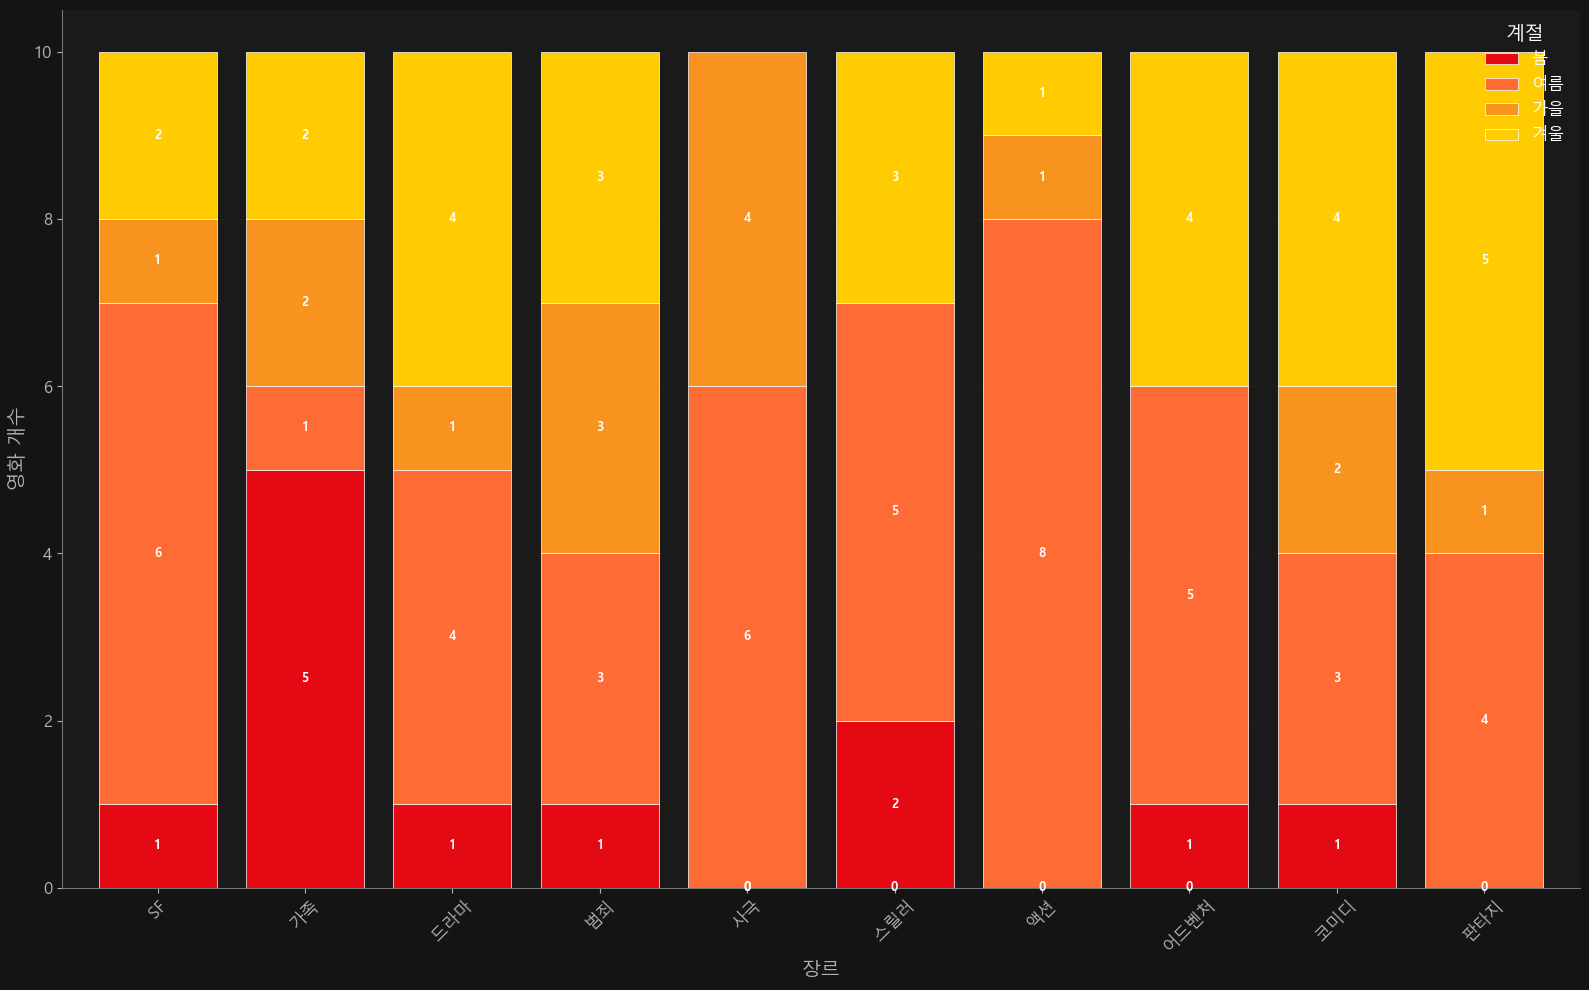

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import ast

# 경고 메시지를 무시합니다.
warnings.filterwarnings('ignore', category=UserWarning)

# Netflix 스타일 설정
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 사용자
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# Netflix 색상 팔레트 정의
netflix_red = '#e50914'
netflix_gray = '#757575'
netflix_light_gray = '#b3b3b3'
netflix_dark_gray = '#333333'
netflix_dark = '#141414'

# 파일 경로 및 메모리 효율을 위한 청크 사이즈를 설정합니다.
file_path = './data/processed/kobis_weekly_final.csv'
chunk_size = 10000

# 데이터를 청크(chunk) 단위로 불러옵니다.
df_chunks = []
try:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        df_chunks.append(chunk)
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    exit()

# 불러온 모든 청크를 하나의 데이터프레임으로 합칩니다.
df = pd.concat(df_chunks, ignore_index=True)
print(f"총 {len(df)}개 행을 불러왔습니다.")

# 'genres' 열의 문자열을 리스트로 변환
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# 장르 데이터프레임 확장 (explode)
df_exploded = df.explode('genres').dropna(subset=['genres', 'release_month', 'revenue'])

# 개봉 월에 따라 계절을 분류하는 함수
def assign_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 'season' 열 추가
df_exploded['season'] = df_exploded['release_month'].apply(assign_season)

# ======================================================
# 3. 장르별 흥행 영화의 개봉 계절 분포 시각화 (Netflix Style)
# ======================================================
print("\n--- 장르별 흥행 영화의 개봉 계절 분포 시각화 ---")

# 장르별 개수가 5개 이상인 장르만 필터링
genre_counts_filtered = df_exploded['genres'].value_counts()
valid_genres = genre_counts_filtered[genre_counts_filtered >= 5].index
df_filtered_genres = df_exploded[df_exploded['genres'].isin(valid_genres)]

# 장르별 상위 10개의 흥행 영화를 선정
top_movies_per_genre = df_filtered_genres.sort_values(by='revenue', ascending=False).groupby('genres').head(10).reset_index(drop=True)

# 상위 10개 장르를 최종 데이터셋으로 사용
top_10_genres_with_movies = top_movies_per_genre['genres'].value_counts().nlargest(10).index
final_df_season = top_movies_per_genre[top_movies_per_genre['genres'].isin(top_10_genres_with_movies)]

# 장르와 계절별 개수 계산
genre_season_counts = final_df_season.groupby(['genres', 'season']).size().unstack(fill_value=0)
genre_season_counts = genre_season_counts[['봄', '여름', '가을', '겨울']]

# Netflix 스타일 계절 색상 (더 어두운 톤)
seasonal_colors = ['#e50914', '#ff6b35', '#f7931e', '#ffcc02']  # 빨강-주황 계열

# 그래프 생성
fig, ax = plt.subplots(figsize=(16, 10), facecolor=netflix_dark)

# 스택 바 차트 생성
bars = genre_season_counts.plot(
    kind='bar', 
    ax=ax,
    stacked=True, 
    color=seasonal_colors,
    width=0.8,
    edgecolor='white',
    linewidth=0.5
)

# Netflix 스타일 적용
ax.set_facecolor('#1a1a1a')
ax.set_xlabel('장르', fontsize=14, color=netflix_light_gray)
ax.set_ylabel('영화 개수', fontsize=14, color=netflix_light_gray)
ax.tick_params(colors=netflix_light_gray, which='both')
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 그리드 설정
ax.grid(True, color=netflix_dark_gray, alpha=0.3, linestyle='-', linewidth=0.5, axis='y')
ax.set_axisbelow(True)

# 스파인 설정
ax.spines['bottom'].set_color(netflix_gray)
ax.spines['left'].set_color(netflix_gray)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 범례 설정 (Netflix 스타일)
legend = ax.legend(
    title='계절', 
    fontsize=12, 
    title_fontsize=14,
    loc='upper right',
    frameon=False,
    facecolor=netflix_dark,
    edgecolor='none'
)

# 범례 텍스트 색상 설정
legend.get_title().set_color('white')
for text in legend.get_texts():
    text.set_color('white')

# 각 바 위에 값 표시 (선택사항)
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white', weight='bold')

plt.tight_layout()

# 배경색 설정
fig.patch.set_facecolor(netflix_dark)

plt.show()


#### **장르별 순수익 기준 상위 3개 영화**